In [1]:
import networkx as nx
from Clustering_Functions import *
from itertools import permutations
import numpy as np
from networkx.algorithms import community
import pandas as pd
import seaborn as sns
import glob

In [ ]:
filename_list = glob.glob("scot-elex/**/*.csv")
results = pd.DataFrame(columns=['filename', 'num_cands', 'clustering', 'k', 'mod'])
count = 1

for filename in filename_list:
    num_cands, election, cand_list, ward = csv_parse(filename)
    party_names = party_abrevs(cand_list)
    C, modularity = Modularity_cluster(election, num_cands=num_cands)
    C_dict = {n:C[n] for n in range(len(C))}
    k = len(C)
    print(count, filename, k, modularity)
    count +=1
    row_num = results.shape[0]
    results.loc[row_num] = [filename, num_cands,C_dict, k, modularity]

In [ ]:
# add k-means clusters to the results dataframe
dif_list = []
Lloyd_cluster_list = []
count = 1
for index in results.index:
    filename = results['filename'][index]
    C_m = results['clustering'][index] # is a dictionary
    C_mod = [C_m[n] for n in range(len(C_m))] # is converted into a list
    k = results['k'][index]
    num_cands, election, cand_list, ward = csv_parse(filename)
    C_lloyd = kmeans(election, k=k)
    C_lloyd_dic = {n:C_lloyd[n] for n in range(len(C_lloyd))}
    dif = Clustering_closeness(election, C_mod, C_lloyd)
    dif_list.append(dif)
    Lloyd_cluster_list.append(C_lloyd_dic)
    print(count, filename)
    count +=1

results['dif']=dif_list
results['lloyd']=Lloyd_cluster_list

In [10]:
results.to_pickle('modularity_clusterings_plus.pkl')

In [2]:
#start here (after importing packages)
results = pd.read_pickle('modularity_clusterings_plus.pkl')

<Axes: xlabel='k', ylabel='Count'>

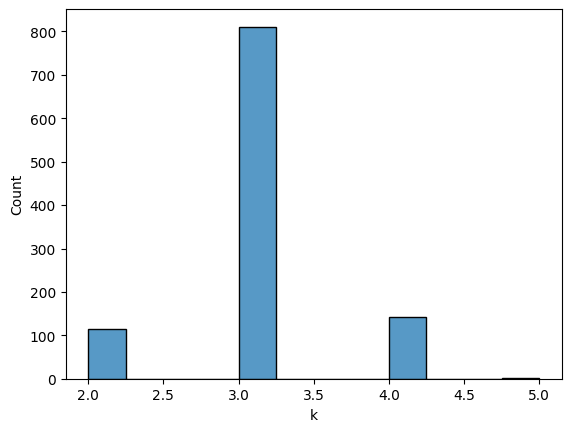

In [3]:
sns.histplot(results, x='k')

<Axes: xlabel='mod'>

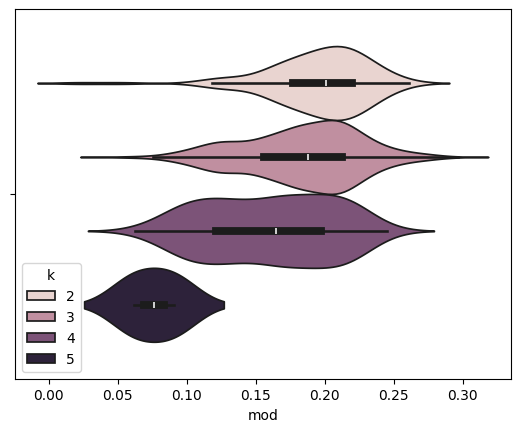

In [4]:
sns.violinplot(results,x='mod', hue = 'k')

<Axes: xlabel='mod'>

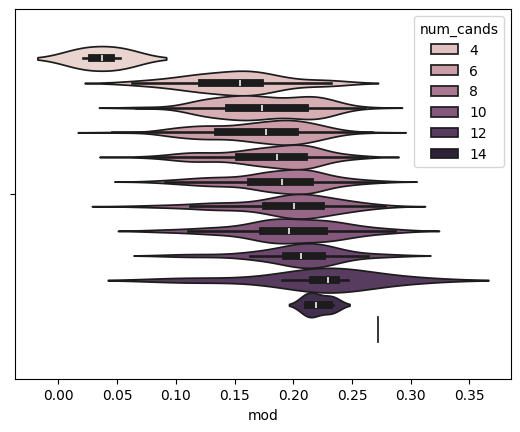

In [13]:
sns.violinplot(results,x='mod',hue='num_cands')

In [7]:
results['k'].unique()

array([3, 4, 2, 5], dtype=int64)

In [8]:
for k in range(1,6):
    print(k,len(results[results['k']==k])/len(results)) 

1 0.0
2 0.10654205607476636
3 0.7579439252336448
4 0.1336448598130841
5 0.001869158878504673


<Axes: xlabel='dif', ylabel='Count'>

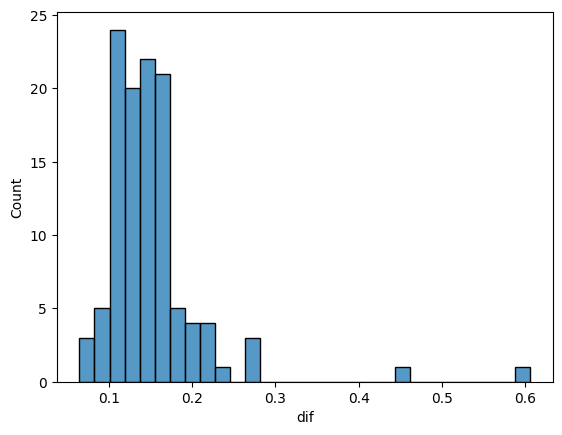

In [14]:
sns.histplot(results[results['k']==2],x='dif')

<Axes: xlabel='dif'>

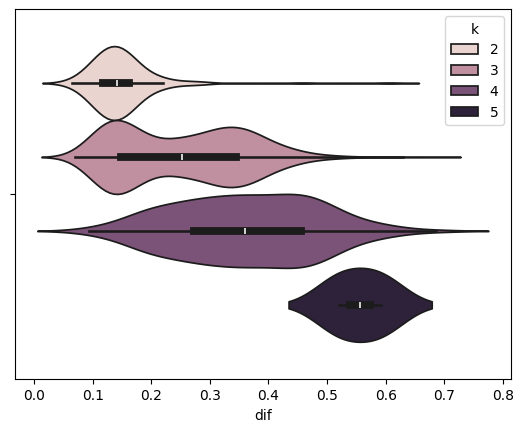

In [15]:
sns.violinplot(results,x='dif', hue = 'k')

In [ ]:
results_5 = results[results['k']==5]
for index in results_5.index:
    filename = results_5['filename'][index]
    C_m = results['clustering'][index] # is a dictionary
    C_mod = [C_m[n] for n in range(len(C_m))] # is converted into a list
    C_l = results['lloyd'][index] # is a dictionary
    C_lloyd = [C_l[n] for n in range(len(C_l))] # is converted into a list
    num_cands, election, cand_list, ward = csv_parse(filename)
    parties = party_abrevs(cand_list)

    dif, perm = Clustering_closeness(election, C_mod, C_lloyd, return_perm=True)
    C_lloyd = [C_lloyd[n] for n in perm]

    projections = Ballot_MDS_plot(election, party_names=parties, return_projections=True)
    Ballot_MDS_plot(election, C_lloyd, projections=projections)
    Ballot_MDS_plot(election, C_mod, projections=projections)

In [5]:
Lloyd_size_list = []
Mod_size_list = []

for index in results.index:
    filename = results['filename'][index]
    num_cands, election, cand_list, ward = csv_parse(filename)
    
    C_m = results['clustering'][index]
    Mod_sizes = sorted([sum(C.values())/sum(election.values()) for C in C_m.values()])
    Mod_size_list.append(Mod_sizes)

    C_l = results['lloyd'][index]
    Lloyd_sizes = sorted([sum(C.values())/sum(election.values()) for C in C_l.values()])
    Lloyd_size_list.append(Lloyd_sizes)

results['lloyd_sizes'] = Lloyd_size_list
results['mod_sizes']= Mod_size_list    

In [6]:
lloyd_min = []
lloyd_max = []
mod_min = []
mod_max = []

for index in results.index:
    lloyd = results['lloyd_sizes'][index]
    lloyd_min.append(min(lloyd))
    lloyd_max.append(max(lloyd))
    mod = results['mod_sizes'][index]
    mod_min.append(min(mod))
    mod_max.append(max(mod))

results['lloyd_min']=lloyd_min
results['lloyd_max']=lloyd_max
results['mod_min']=mod_min
results['mod_max']=mod_max

<Axes: xlabel='mod_min'>

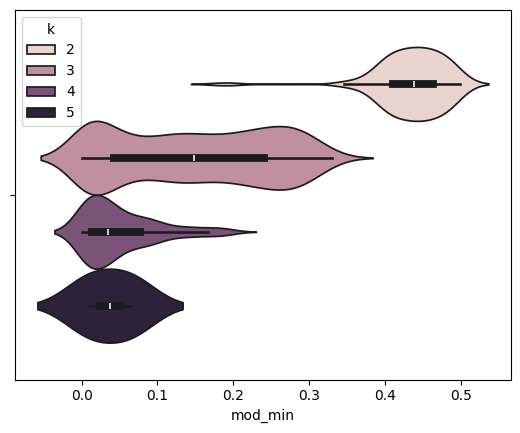

In [66]:
sns.violinplot(results, x='mod_min', hue = 'k')

<Axes: xlabel='mod_max'>

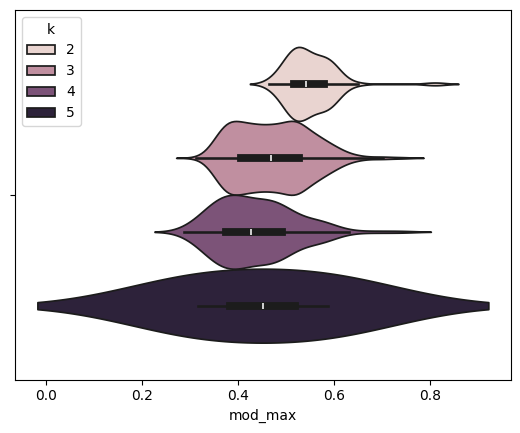

In [7]:
sns.violinplot(results, x='mod_max', hue = 'k')

<Axes: xlabel='lloyd_min'>

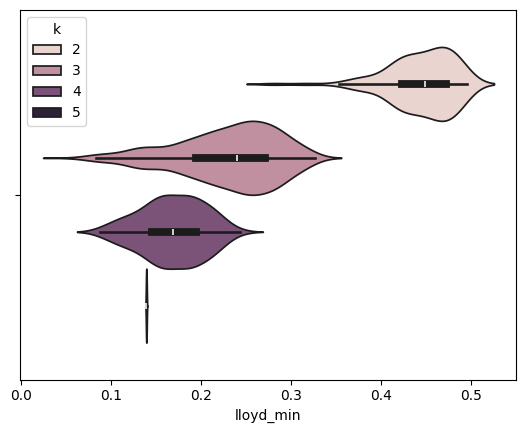

In [68]:
sns.violinplot(results, x='lloyd_min', hue = 'k')

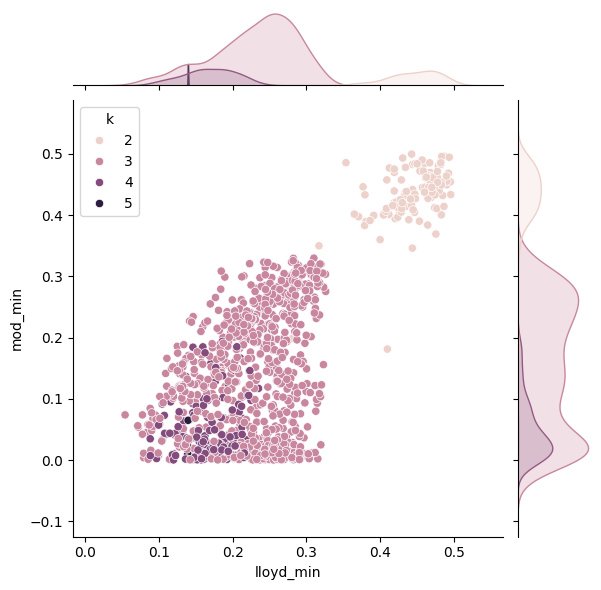

In [65]:
sns.jointplot(results, x = 'lloyd_min', y='mod_min', hue = 'k')

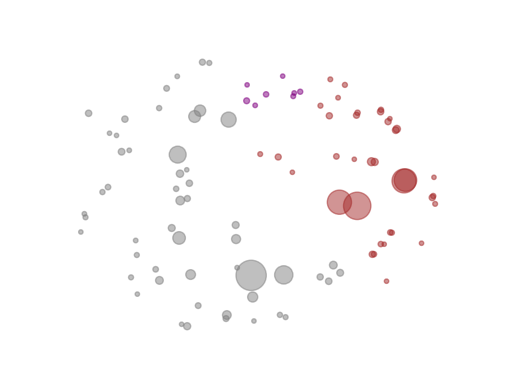

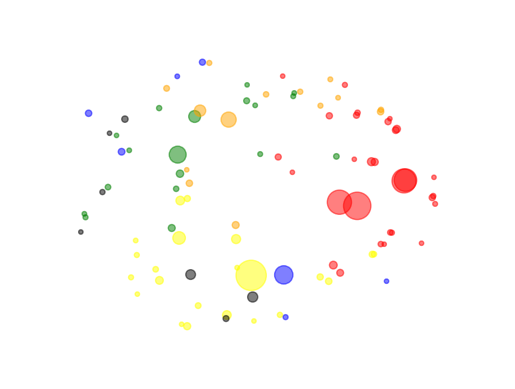

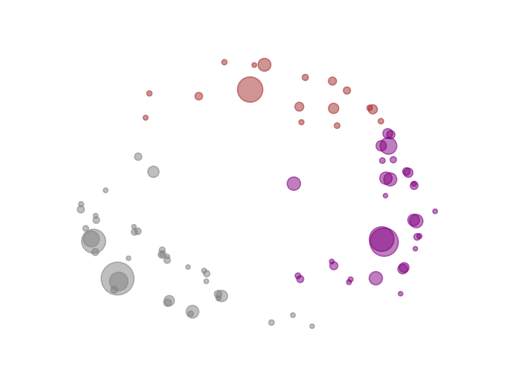

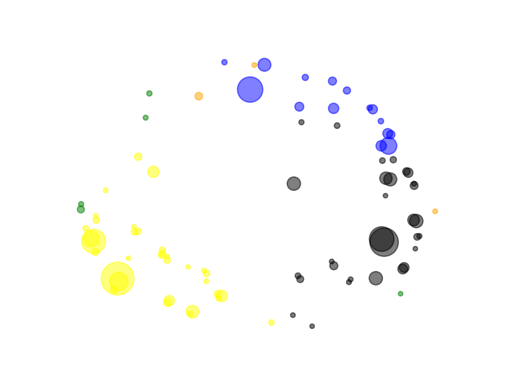

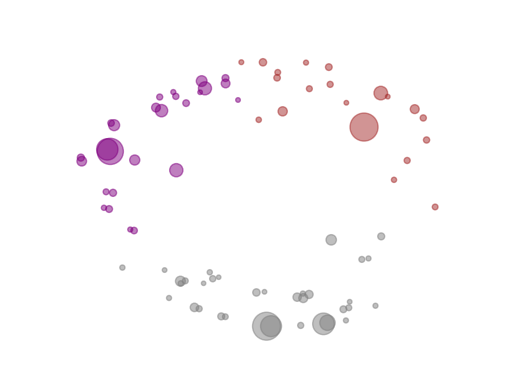

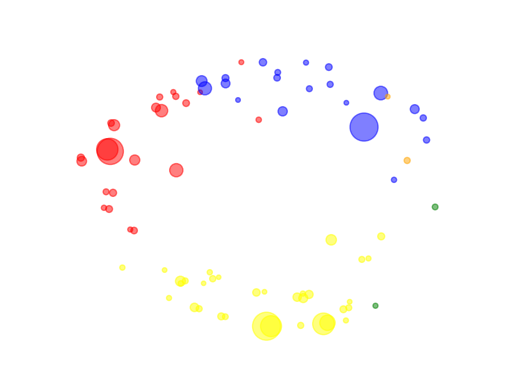

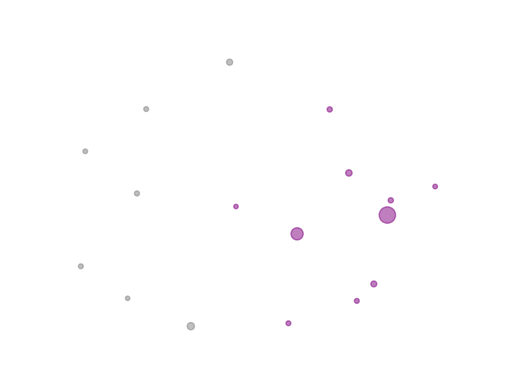

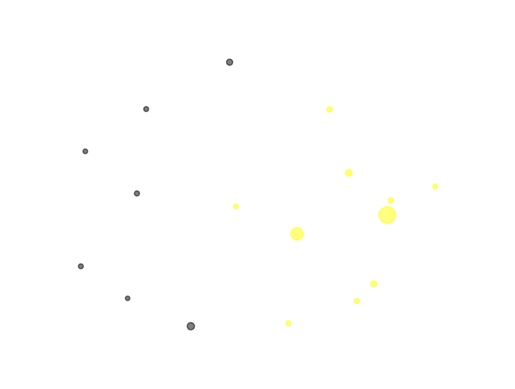

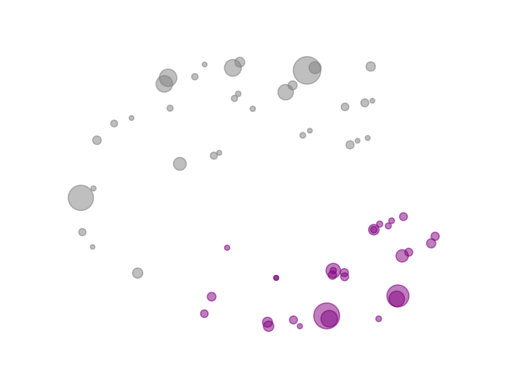

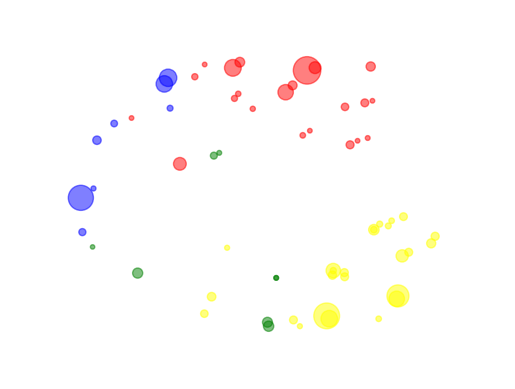

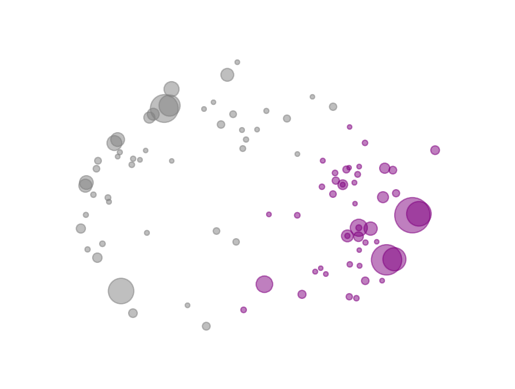

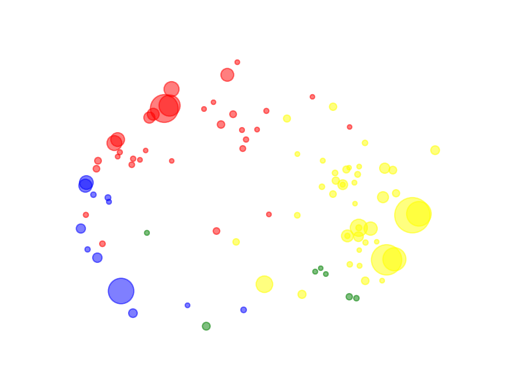

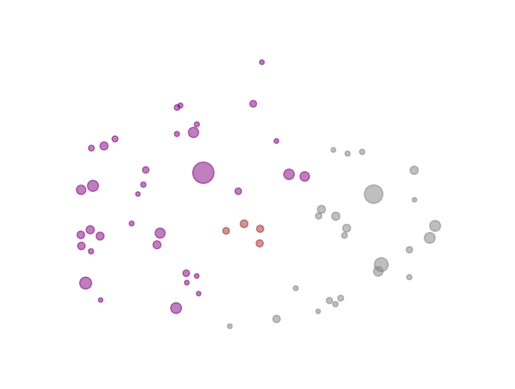

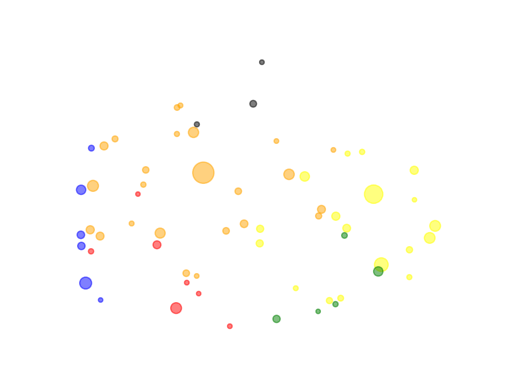

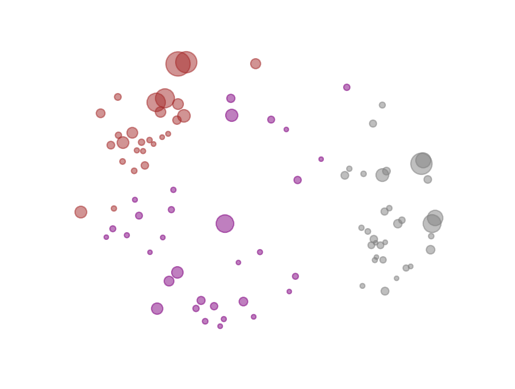

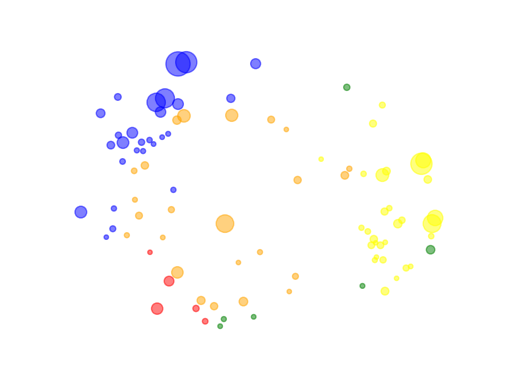

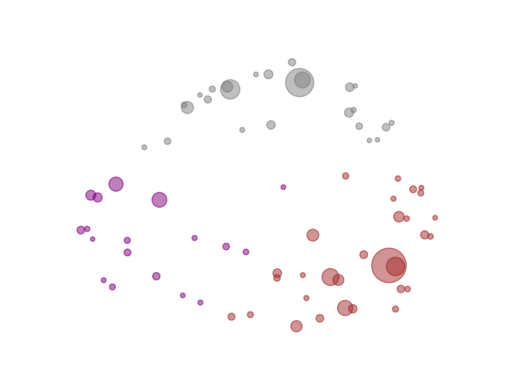

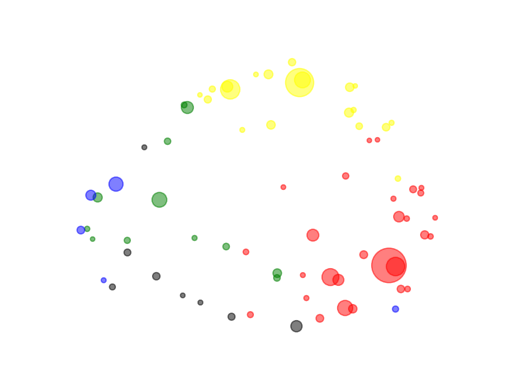

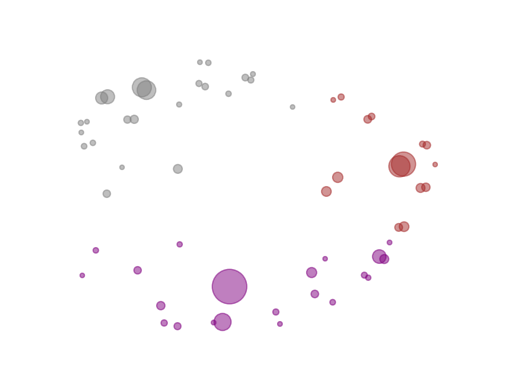

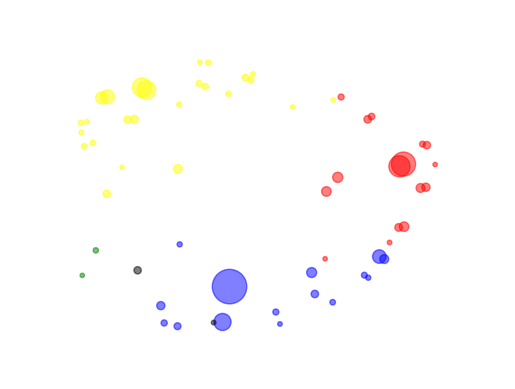

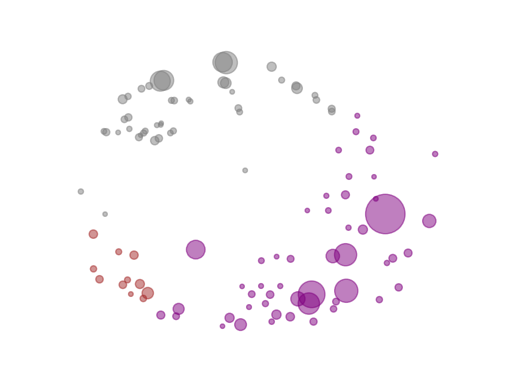

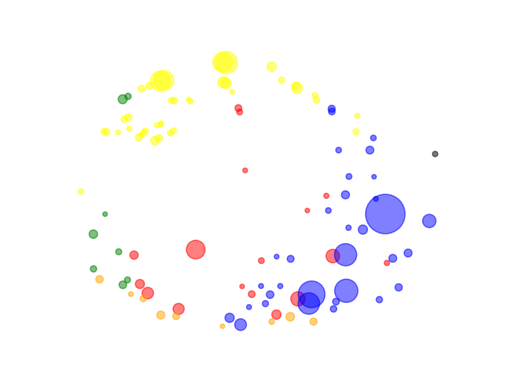

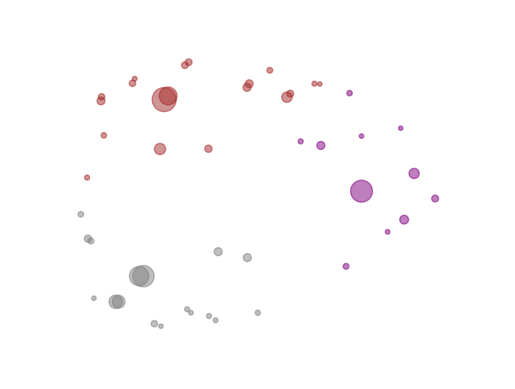

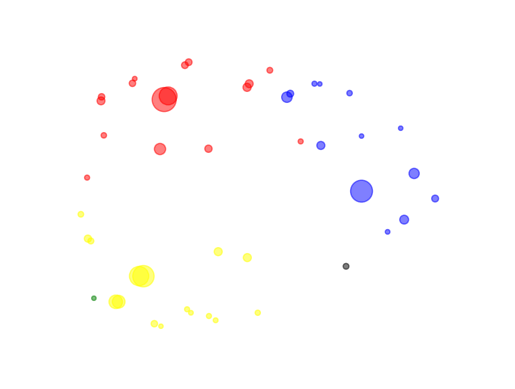

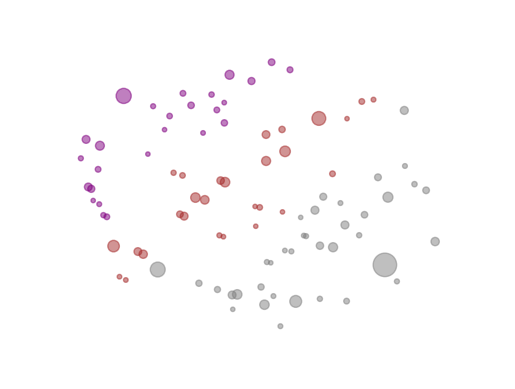

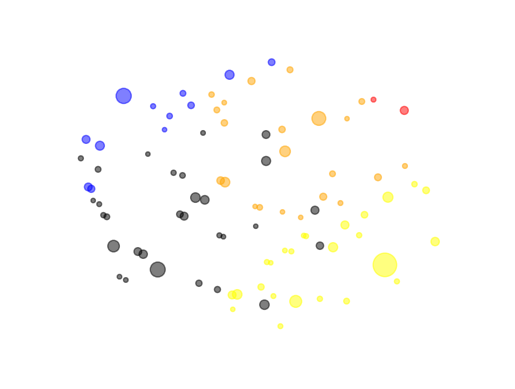

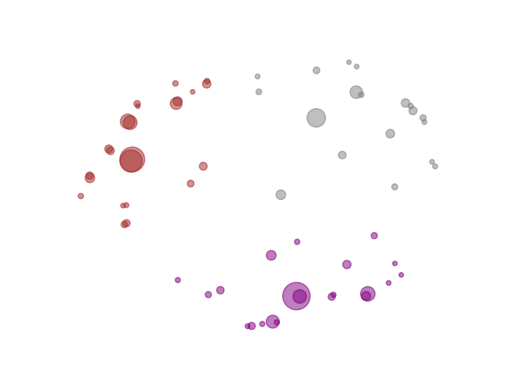

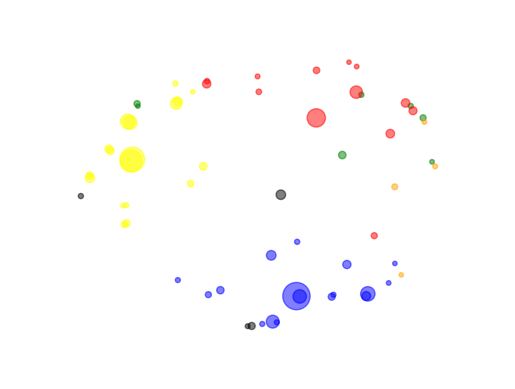

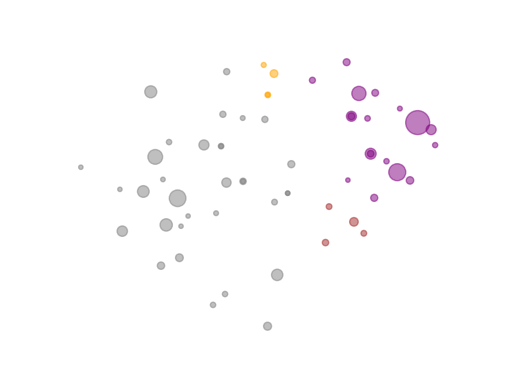

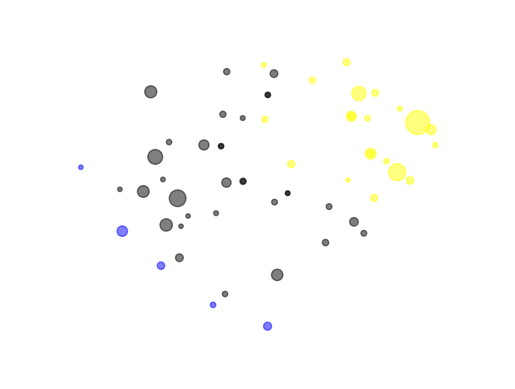

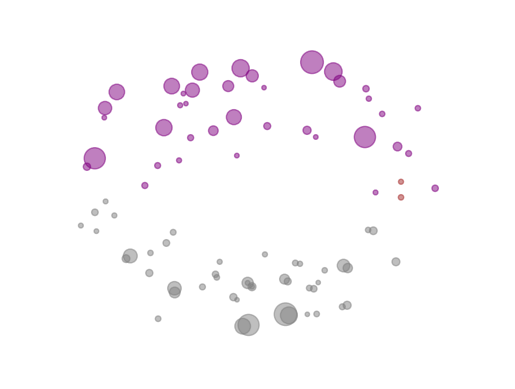

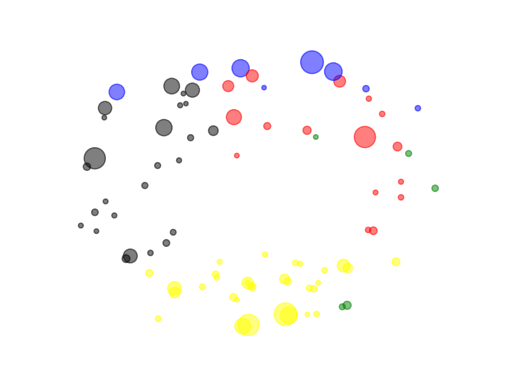

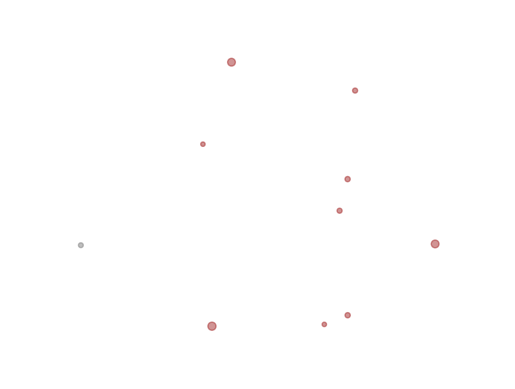

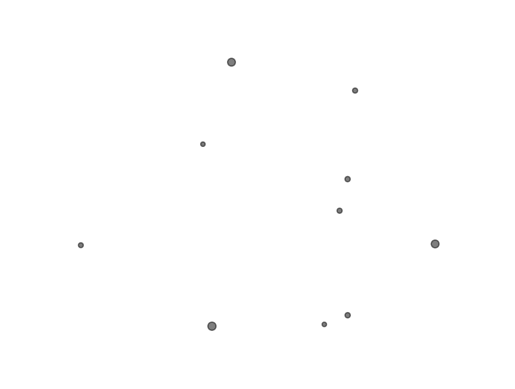

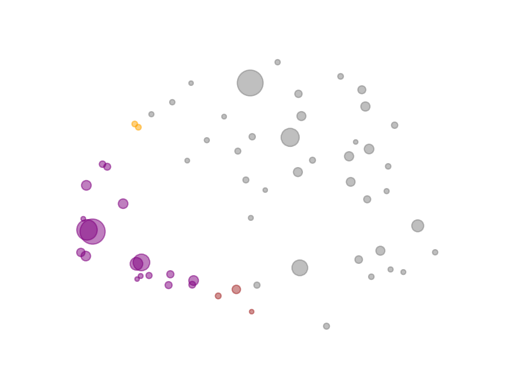

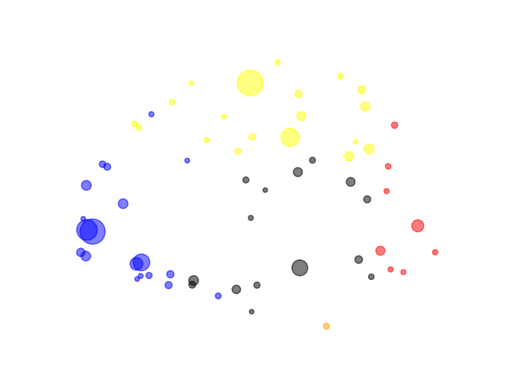

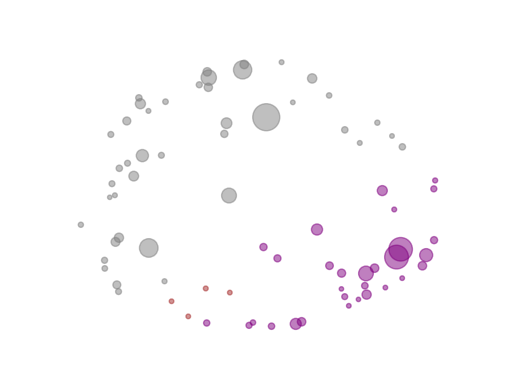

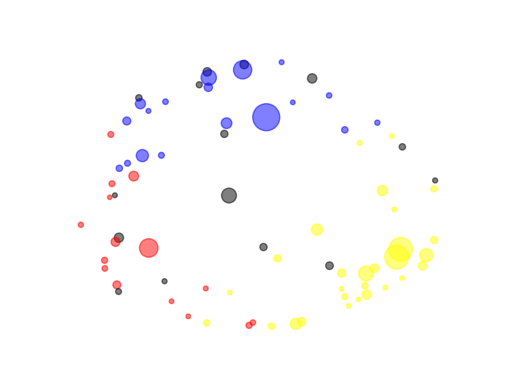

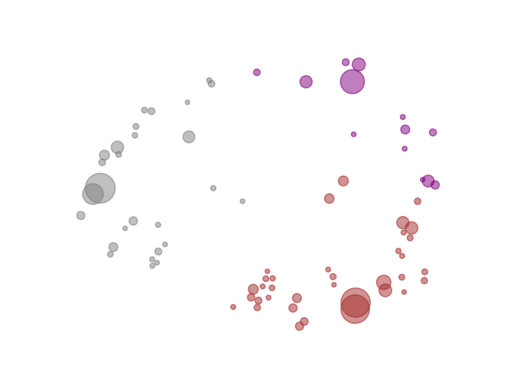

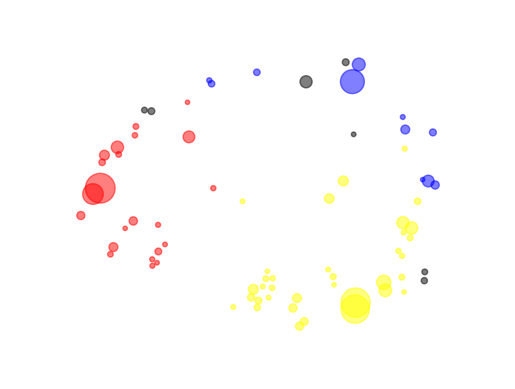

In [85]:
for _ in range(20):
    filename=np.random.choice(filename_list)
    num_cands, election, cand_list, ward = csv_parse(filename)
    party_names = party_abrevs(cand_list)
    C, modularity = Modularity_cluster(election, num_cands=num_cands)
    projections = Ballot_MDS_plot(election, C, return_projections=True)
    Ballot_MDS_plot(election, party_names=party_names, projections=projections)
    

In [87]:
results[results['k']==5]

,filename,num_cands,clustering,k,mod,dif,smallest
681,scot-elex\7_cands\sc_borders_2012_ward10.csv,7,"{0: {(2, 3, 6, 1, 5, 7): 1, (7, 3, 5): 1, (1, ...",5,0.061786,0.142951,0.009814
890,scot-elex\8_cands\orkney_2017_ward6.csv,8,"{0: {(5, 2, 1, 8, 6, 3, 7): 1, (5, 4, 2): 1, (...",5,0.091006,0.288372,0.065116
